# GPyOpt test

GPyOptの使い方をRosenbrock関数の最小化を例に概説する

## インストール


In [1]:
%%bash
pip install GPyOpt pyDOE

pygem 1.1 has requirement Sphinx==1.4, but you'll have sphinx 1.7.4 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Rosenbrock 関数
* 最適化ベンチマーク関数
* 通称バナナ関数

$$
f(x_1,x_2) = (1.0-x_1)^2 + 100(x_x-x_1^2)^2
$$

In [2]:
def rosenbrock(X):
    return (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2

### plot

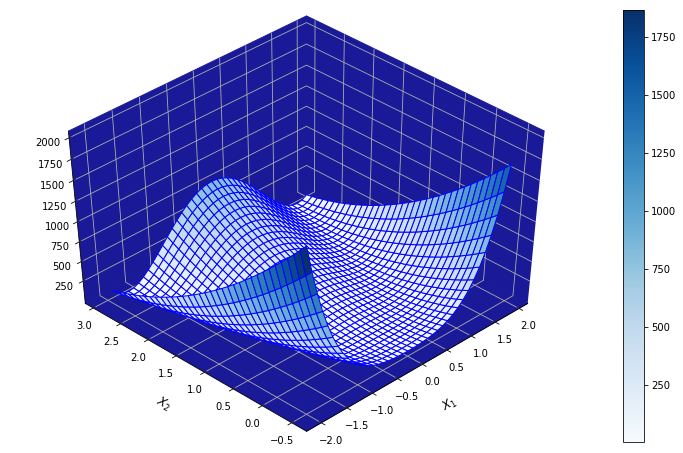

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-2, 2, 0.1) #x1
y = np.arange(-0.5, 3, 0.1) #2

X,Y = np.meshgrid(x, y)
XY =np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))
Z =rosenbrock(XY).reshape(X.shape)


fig = plt.figure(figsize=(10,6)) #図の準備
ax = Axes3D(fig) #プロットスペースの定義

for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis.set_pane_color((0.1,0.1,0.6,1))  # a color of each axis
    
surf =ax.plot_surface(X,Y,Z, cmap='Blues',edgecolors="b")# plot
fig.patch.set_alpha(0)  # 図全体の背景透明度
ax.patch.set_alpha(0)  # subplotの背景透明度
fig.colorbar(surf) # colorbarの秒さy
ax.set_xlabel("$X_1$",fontsize=12,labelpad=14)#ラベルx1
ax.set_ylabel("$X_2$",fontsize=12,labelpad=14)#ラベル
ax.azim=-135 #プロットエリアの視点調整
ax.elev=45  #プロットエリアの視点調整


## 最小化問題

$$
\begin{eqnarray}
 {\rm minimumize} \quad  f &=& (1.0 - x_1)^2 + 100(x_2 -x_1^2)^2 \\
 {\rm subject \quad to} \quad &\quad &-2.0 \leq  x_1 \leq 2.0\\
  \quad &\quad &-0.5 \leq  x_2 \leq 3.0
\end{eqnarray}
$$

最適解は
$$
\begin{eqnarray}
 {\rm min} \quad f &:& 0 \\
 {\rm argmin} \quad f &:& (x_1,x_2) = (1,1) \\
\end{eqnarray}
$$

これをGPyOptを用いて計算する

In [4]:
import GPyOpt
from numpy.random import seed 

def rosenbrock(X):
    return (1-X[:,0])**2 + 100*(X[:,1]-X[:,0]**2)**2

bounds =[{'name': 'x_1', 'type': 'continuous', 'domain': (-2,2)}, 
         {'name': 'x_2', 'type': 'continuous', 'domain': (-0.5,3)}]

seed(123) 

myProblem = GPyOpt.methods.BayesianOptimization(rosenbrock,                   #最適化したい関数
                                                domain=bounds,                #変数の範囲
                                                acquisition_type='EI',        #獲得関数の種類
                                                exact_feval = True,           #最終出力を計算するか
                                                initial_design_type ="latin", #初期実験の方法(ラテン超方格実験)
                                                initial_design_numdata=20 )   #初期実験の実験数
max_iter = 30
myProblem.run_optimization(max_iter) 

最適解は

In [5]:
print("   min f: {:.5f}".format(myProblem.fx_opt)) 
print("argmin f: {:.5f}, {:.5f}".format(myProblem.x_opt[0], 
                                        myProblem.x_opt[1]))

   min f: 0.00632
argmin f: 1.06560, 1.13101


探索と活用の履歴と収束状況を確認する

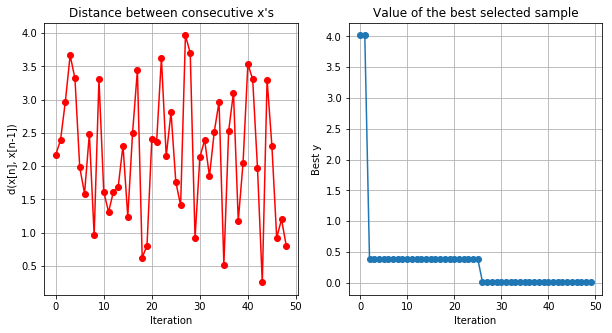

In [6]:
myProblem.plot_convergence() 

獲得関数と実験点の状況

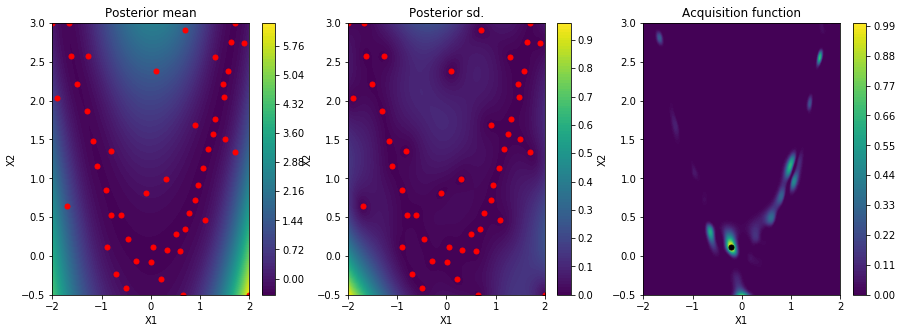

In [7]:
myProblem.plot_acquisition()